<a href="https://colab.research.google.com/github/premkumarkora/predict_income_Logistic_Regression/blob/main/predict_income_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
from google.colab import drive
drive.mount('/content/drive')
location = "/content/drive/My Drive/Colab Notebooks/data/adult.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [103]:
df = pd.read_csv(location)
df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [104]:
df.shape

(32561, 15)

In [105]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  class           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [107]:
df['education'].unique()
df['education'].value_counts()
df['education']= label_encoder.fit_transform(df['education'])

In [108]:
df['occupation'].unique()
df['occupation'].value_counts()
df['occupation']= label_encoder.fit_transform(df['occupation'])
      

In [109]:
df['relationship'].unique()
df['relationship'].value_counts()
df['relationship']= label_encoder.fit_transform(df['relationship'])

In [110]:
df['race'].unique()
df['race'].value_counts()
df['race']= label_encoder.fit_transform(df['race'])

In [111]:
 
df['sex'].unique()
df['sex'].value_counts()
df['sex']= label_encoder.fit_transform(df['sex'])

In [112]:
df['marital-status'].unique()
df['marital-status'].value_counts()
df['marital-status']= label_encoder.fit_transform(df['marital-status'])

In [113]:
df['native-country'].unique()
df['native-country'].value_counts()
df['native-country']= label_encoder.fit_transform(df['native-country'])

In [114]:
df.workclass.unique()
df['workclass'].value_counts()
df.drop(df[df['workclass'] == '?'].index, inplace=True)
df['workclass']= label_encoder.fit_transform(df['workclass'])

In [115]:
df['class'].unique()
df['class'] = df['class'].map({' <=50K' : 0, ' >50K' : 1})

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int64
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int64
 4   education-num   32561 non-null  int64
 5   marital-status  32561 non-null  int64
 6   occupation      32561 non-null  int64
 7   relationship    32561 non-null  int64
 8   race            32561 non-null  int64
 9   sex             32561 non-null  int64
 10  capital-gain    32561 non-null  int64
 11  capital-loss    32561 non-null  int64
 12  hours-per-week  32561 non-null  int64
 13  native-country  32561 non-null  int64
 14  class           32561 non-null  int64
dtypes: int64(15)
memory usage: 4.0 MB


In [117]:
df['workclass'] = df['workclass'].astype('int')
df['marital-status'] = df['marital-status'].astype('int') 
df['native-country'] = df['native-country'].astype('int')

In [118]:
df = df.drop_duplicates() # There where few duplicates in the dataframe and it has been removed.
df.shape

(32537, 15)

In [119]:
df.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
count,32537.00,32537.00,32537.00,32537.00,32537.00,32537.00,32537.00,32537.00,32537.00,32537.00,32537.00,32537.00,32537.00,32537.00,32537.00
mean,38.59,3.87,189780.85,10.30,10.08,2.61,6.57,1.45,3.67,0.67,1078.44,87.37,40.44,36.72,0.24
std,13.64,1.46,105556.47,3.87,2.57,1.51,4.23,1.61,0.85,0.47,7387.96,403.10,12.35,7.82,0.43
min,17.00,0.00,12285.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
25%,28.00,4.00,117827.00,9.00,9.00,2.00,3.00,0.00,4.00,0.00,0.00,0.00,40.00,39.00,0.00
50%,37.00,4.00,178356.00,11.00,10.00,2.00,7.00,1.00,4.00,1.00,0.00,0.00,40.00,39.00,0.00
75%,48.00,4.00,236993.00,12.00,12.00,4.00,10.00,3.00,4.00,1.00,0.00,0.00,45.00,39.00,0.00
max,90.00,8.00,1484705.00,15.00,16.00,6.00,14.00,5.00,4.00,1.00,99999.00,4356.00,99.00,41.00,1.00


In [120]:
linear_vars = df.select_dtypes(include=[np.number]).columns
for i in linear_vars:
  iqr = df[i].quantile(0.75)- df[i].quantile(0.25)
  upper_threshold = df[i].quantile(0.75)+(1.5*iqr)
  lower_threshold = df[i].quantile(0.25)+(1.5*iqr)
  print(i,':', "Upper :", upper_threshold, "Lower :",lower_threshold)

age : Upper : 78.0 Lower : 58.0
workclass : Upper : 4.0 Lower : 4.0
fnlwgt : Upper : 415742.0 Lower : 296576.0
education : Upper : 16.5 Lower : 13.5
education-num : Upper : 16.5 Lower : 13.5
marital-status : Upper : 7.0 Lower : 5.0
occupation : Upper : 20.5 Lower : 13.5
relationship : Upper : 7.5 Lower : 4.5
race : Upper : 4.0 Lower : 4.0
sex : Upper : 2.5 Lower : 1.5
capital-gain : Upper : 0.0 Lower : 0.0
capital-loss : Upper : 0.0 Lower : 0.0
hours-per-week : Upper : 52.5 Lower : 47.5
native-country : Upper : 39.0 Lower : 39.0
class : Upper : 0.0 Lower : 0.0


In [121]:
def removeoutliers(df, listvars, z):
    from scipy import stats
    for var in listvars:
        df1 = df[np.abs(stats.zscore(df[var])) < z]
    return df1
df = removeoutliers(df, linear_vars,3)

In [122]:
for i in linear_vars:
  iqr = df[i].quantile(0.75)- df[i].quantile(0.25)
  upper_threshold = df[i].quantile(0.75)+(1.5*iqr)
  lower_threshold = df[i].quantile(0.25)+(1.5*iqr)
  print(i,':', "Upper :", upper_threshold, "Lower :",lower_threshold)

age : Upper : 78.0 Lower : 58.0
workclass : Upper : 4.0 Lower : 4.0
fnlwgt : Upper : 415742.0 Lower : 296576.0
education : Upper : 16.5 Lower : 13.5
education-num : Upper : 16.5 Lower : 13.5
marital-status : Upper : 7.0 Lower : 5.0
occupation : Upper : 20.5 Lower : 13.5
relationship : Upper : 7.5 Lower : 4.5
race : Upper : 4.0 Lower : 4.0
sex : Upper : 2.5 Lower : 1.5
capital-gain : Upper : 0.0 Lower : 0.0
capital-loss : Upper : 0.0 Lower : 0.0
hours-per-week : Upper : 52.5 Lower : 47.5
native-country : Upper : 39.0 Lower : 39.0
class : Upper : 0.0 Lower : 0.0


In [123]:
df.corr()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
age,1.00,0.00,-0.08,-0.01,0.04,-0.27,-0.02,-0.26,0.03,0.09,0.08,0.06,0.07,-0.00,0.23
workclass,0.00,1.00,-0.02,0.02,0.05,-0.06,0.25,-0.09,0.05,0.10,0.03,0.01,0.14,-0.01,0.05
fnlwgt,-0.08,-0.02,1.00,-0.03,-0.04,0.03,0.00,0.01,-0.02,0.03,0.00,-0.01,-0.02,-0.05,-0.01
education,-0.01,0.02,-0.03,1.00,0.36,-0.04,-0.02,-0.01,0.01,-0.03,0.03,0.02,0.06,0.06,0.08
education-num,0.04,0.05,-0.04,0.36,1.00,-0.07,0.11,-0.09,0.03,0.01,0.12,0.08,0.15,0.05,0.34
marital-status,-0.27,-0.06,0.03,-0.04,-0.07,1.00,-0.01,0.19,-0.07,-0.13,-0.04,-0.03,-0.19,-0.02,-0.20
occupation,-0.02,0.25,0.00,-0.02,0.11,-0.01,1.00,-0.08,0.01,0.08,0.03,0.02,0.08,-0.01,0.08
relationship,-0.26,-0.09,0.01,-0.01,-0.09,0.19,-0.08,1.00,-0.12,-0.58,-0.06,-0.06,-0.25,-0.01,-0.25
race,0.03,0.05,-0.02,0.01,0.03,-0.07,0.01,-0.12,1.00,0.09,0.01,0.02,0.04,0.14,0.07
sex,0.09,0.10,0.03,-0.03,0.01,-0.13,0.08,-0.58,0.09,1.00,0.05,0.05,0.23,-0.01,0.22


In [124]:
df[['age','education-num', 'relationship','sex', 'capital-gain', 'hours-per-week', 'class']].corr()

,age,education-num,relationship,sex,capital-gain,hours-per-week,class
age,1.00,0.04,-0.26,0.09,0.08,0.07,0.23
education-num,0.04,1.00,-0.09,0.01,0.12,0.15,0.34
relationship,-0.26,-0.09,1.00,-0.58,-0.06,-0.25,-0.25
sex,0.09,0.01,-0.58,1.00,0.05,0.23,0.22
capital-gain,0.08,0.12,-0.06,0.05,1.00,0.08,0.22
hours-per-week,0.07,0.15,-0.25,0.23,0.08,1.00,0.23
class,0.23,0.34,-0.25,0.22,0.22,0.23,1.00


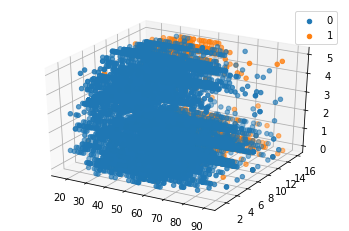

In [125]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for s in df['class'].unique():
    ax.scatter(df.age[df['class']==s],df['education-num'][df['class']==s],df['relationship'][df['class']==s],label=s)
    
ax.legend()

In [183]:
X = df[['age','education-num', 'relationship','sex', 'capital-gain', 'hours-per-week']] # Before Feature Selection
#X = df[['age','education-num', 'relationship','sex', 'capital-gain', 'hours-per-week' , 'marital-status', 'race']].head(5000) #After Feature Selection
y = df['class']

In [184]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30)

# Normlising/Scaling the data

In [185]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #initialis
scaler.fit(X_train) # find the values of mu and sigma
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) #only transform the test dataset, dont fit it



In [ ]:
!pip install lazypredict

In [162]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:05<00:00,  5.64it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.85,0.76,0.76,0.84,0.55
AdaBoostClassifier,0.84,0.75,0.75,0.84,0.21
LGBMClassifier,0.83,0.75,0.75,0.83,0.18
BaggingClassifier,0.82,0.74,0.74,0.82,0.07
RandomForestClassifier,0.82,0.74,0.74,0.82,0.42
NearestCentroid,0.73,0.74,0.74,0.74,0.02
KNeighborsClassifier,0.81,0.73,0.73,0.81,0.10
SVC,0.84,0.73,0.73,0.83,0.69
DecisionTreeClassifier,0.80,0.72,0.72,0.80,0.02


Did Linear Regression to see what happens, Horrible Accuracy

```
from sklearn.linear_model import LinearRegression
regerrsor = LinearRegression()
regerrsor.fit(X_train, y_train)
y_pred = regerrsor.predict(X_test)
regerrsor.coef_
regerrsor.intercept_
from sklearn import metrics
print(metrics.r2_score(y_test, y_pred))
regerrsor.score(X_test,y_test)
```



In [186]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)

In [187]:
logistic_regression.coef_

array([[ 0.55199672,  0.85678636, -0.23962813,  0.40997637,  2.17411499,
         0.39797271]])

In [188]:
X_train.shape

(22775, 6)

In [189]:
logistic_regression.intercept_

array([-1.45501376])

```
from sklearn.tree import DecisionTreeClassifier
logistic_regression = DecisionTreeClassifier()
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)

Accuracy 0.7993333333333333
[[996 147]
 [154 203]]


```



Accuracy 0.819299323909035
[[7009  368]
 [1396  989]]


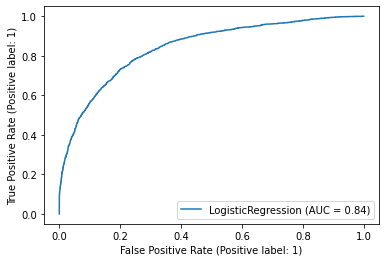

In [190]:
from sklearn.metrics import accuracy_score, plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
print('Accuracy',logistic_regression.score(X_test,y_test)) # accuracy
print(confusion_matrix(y_test,y_pred))
f1_score(y_test,y_pred)
#logistic_regression.score(X_test,y_test)
plot_roc_curve(logistic_regression, X_test, y_test)
#accuracy_score(y_test,y_pred)

#Feature Selection



In [139]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

In [144]:
#df = pd.read_csv(location)
X = df.drop(['class'], axis=1,   inplace=False)
y = df['class']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30)


In [149]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=6, step=1)
selector = selector.fit(X_train, y_train)
list(zip(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],selector.support_))

[('age', True),
 ('workclass', False),
 ('fnlwgt', False),
 ('education', False),
 ('education-num', True),
 ('marital-status', True),
 ('occupation', False),
 ('relationship', True),
 ('race', True),
 ('sex', True),
 ('capital-gain', False),
 ('capital-loss', False),
 ('hours-per-week', False),
 ('native-country', False)]

In [147]:
from sklearn.feature_selection import SequentialFeatureSelector
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=5)
sfs.fit(X_train, y_train)
print(list(zip(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],sfs.get_support())))

[('age', True), ('workclass', False), ('fnlwgt', False), ('education', False), ('education-num', True), ('marital-status', False), ('occupation', False), ('relationship', True), ('race', False), ('sex', False), ('capital-gain', True), ('capital-loss', False), ('hours-per-week', True), ('native-country', False)]


Based on the above feature selections we came up with the follwoing features

In [ ]:
education-num, marital-status, relationship, race, sex  # based on RFE
age, education-num, relationship, capital-gain, hours-per-week, #from SequentialFeatureSelector, Seems to be having more Au_Roc
'age','education-num', 'relationship','sex', 'capital-gain', 'hours-per-week' # These features are based on the correlation coeefficents 